In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns

Text(0, 0.5, 'Per capita growth rate')

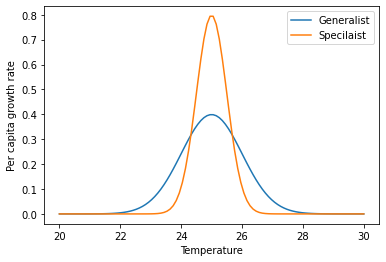

In [2]:
# Fitness curve for species A and B, which are generalist and specialist, respectively.
mu = 25
sigma_A, sigma_B = 1, 0.5

X = np.linspace(20, 30, 100)

fig , ax = plt.subplots()
plt.plot(X, stats.norm.pdf(X, mu, sigma_A), label='Generalist')
plt.plot(X, stats.norm.pdf(X, mu, sigma_B), label='Specilaist')
plt.legend(loc='upper right') 
plt.xlabel('Temperature')
plt.ylabel('Per capita growth rate')

In [3]:
def generate_environment(short_sigma, long_sigma, mu=mu):
    df = pd.DataFrame({})
    generations = np.random.normal(mu, long_sigma, 10)
    for i, gen in enumerate(generations):
        df[i] = np.random.normal(gen, short_sigma, 5)
    return df

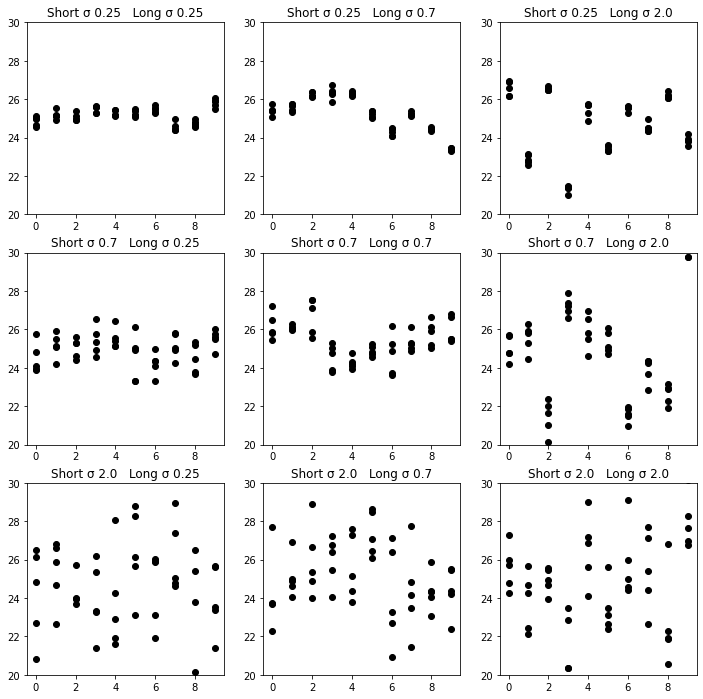

In [54]:
sigmas = [0.25, 0.7, 2.]
dfs = [[[], [], []], [[], [], []], [[], [], []]]

fig, axs = plt.subplots(3, 3, figsize=(12,12))

for i, short in enumerate(sigmas):
    for j, long in enumerate(sigmas):
        dfs[i][j] = generate_environment(short, long, mu=mu)
        axs[i, j].plot(dfs[i][j].T, 'ko')
        axs[i, j].set_ylim([20, 30])
        axs[i, j].set_title('Short σ '+ str(short) + '   Long σ ' + str(long))


In [48]:
dfs[1][1]

,0,1,2,3,4,5,6,7,8,9
0,25.186420,24.371759,24.926306,25.019720,25.398903,23.208801,23.206446,25.479199,25.163598,26.760637
1,25.644321,23.495191,24.968562,26.951399,24.333668,24.313782,24.182234,27.426500,23.144365,26.668349
2,24.666982,23.336901,25.221457,25.503215,25.500784,23.386039,24.694832,24.953998,25.381334,26.666373
3,25.395157,24.174363,25.141748,25.417273,23.374100,26.078847,24.606348,26.101844,24.662442,27.449240
4,25.099814,23.615343,24.190994,25.446069,24.847768,24.318933,23.160317,25.644420,24.141224,26.547324


In [47]:
stats.norm.pdf(dfs[1][1], mu, sigma_A)

array([[0.39207007, 0.32749517, 0.39786046, 0.39886472, 0.36843153,
        0.08020771, 0.07986993, 0.35566911, 0.39363914, 0.08468129],
       [0.32416155, 0.12858528, 0.39874518, 0.05943232, 0.31951918,
        0.31525097, 0.28555834, 0.02100722, 0.07131636, 0.09919852],
       [0.37742283, 0.10006981, 0.38927853, 0.35149801, 0.35192723,
        0.10846009, 0.38079186, 0.39852039, 0.37096538, 0.09952581],
       [0.36897994, 0.28371735, 0.3949545 , 0.36567995, 0.10638252,
        0.22293088, 0.36919899, 0.21741029, 0.37684879, 0.01987431],
       [0.39695991, 0.15296042, 0.28760031, 0.36116245, 0.39434628,
        0.31636315, 0.07344958, 0.32414089, 0.27590824, 0.12050731]])

In [55]:
K0 = K1 = 100.
a01 = a10 = 0.2

for i, short in enumerate(sigmas):
    for j, long in enumerate(sigmas):
        l0=[]
        l1=[]
        for index, row in dfs[i][j].iteritems():
            x0 = x1 = 5
            for k in row:
                r0 = stats.norm.pdf(k, mu, sigma_A)
                r1 = stats.norm.pdf(k, mu, sigma_B)
                x0 *= r0*x0 * (1 - x0/K0 - a01/K0)
                x1 *= r1*x1 * (1 - x1/K1 - a10/K1) 
            l0.append(x0)
            l1.append(x1)
        A_score = stats.gmean(l0)
        B_score = stats.gmean(l1)
        print('Short:', short, '\tLong', long, '\t',  ('Generalist wins' if A_score >= B_score else 'Specialist wins'))


Short: 0.25 	Long 0.25 	 Specialist wins
Short: 0.25 	Long 0.7 	 Specialist wins
Short: 0.25 	Long 2.0 	 Generalist wins
Short: 0.7 	Long 0.25 	 Specialist wins
Short: 0.7 	Long 0.7 	 Specialist wins
Short: 0.7 	Long 2.0 	 Specialist wins
Short: 2.0 	Long 0.25 	 Generalist wins
Short: 2.0 	Long 0.7 	 Generalist wins
Short: 2.0 	Long 2.0 	 Generalist wins


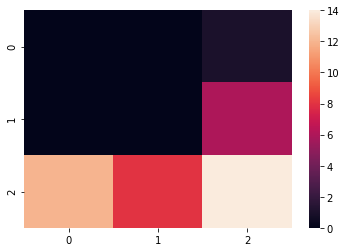

In [57]:
dfs = [[[] for i in sigmas] for i in sigmas]
bar = [[0 for i in sigmas] for i in sigmas]

#fig, axs = plt.subplots(3, 3, figsize=(12,12))
for epoch in range(20):
    for i, short in enumerate(sigmas):
        for j, long in enumerate(sigmas):
            dfs[i][j] = generate_environment(short, long, mu=mu)
            l0=[]
            l1=[]
            for index, row in dfs[i][j].iteritems():
                x0 = x1 = 5
                for k in row:
                    r0 = stats.norm.pdf(k, mu, sigma_A)
                    r1 = stats.norm.pdf(k, mu, sigma_B)
                    x0 *= r0*x0 * (1 - x0/K0 - a01/K0)
                    x1 *= r1*x1 * (1 - x1/K1 - a10/K1) 
                l0.append(x0)
                l1.append(x1)
            A_score = stats.gmean(l0)
            B_score = stats.gmean(l1)

            if A_score > B_score:
                bar[i][j] += 1
                
ax = sns.heatmap(bar)

In [58]:
sigmas = np.add(list(range(20)), 1)/10
bar = [[0 for i in sigmas] for i in sigmas]
dfs = [[[] for i in sigmas] for i in sigmas]

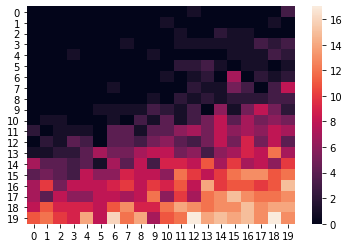

In [59]:

for epoch in range(20):
    for i, short in enumerate(sigmas):
        for j, long in enumerate(sigmas):
            dfs[i][j] = generate_environment(short, long, mu=mu)
            l0=[]
            l1=[]
            for index, row in dfs[i][j].iteritems():
                x0 = x1 = 5
                for k in row:
                    r0 = stats.norm.pdf(k, mu, sigma_A)
                    r1 = stats.norm.pdf(k, mu, sigma_B)
                    x0 *= r0*x0 * (1 - x0/K0 - a01/K0)
                    x1 *= r1*x1 * (1 - x1/K1 - a10/K1) 
                l0.append(x0)
                l1.append(x1)
            A_score = stats.gmean(l0)
            B_score = stats.gmean(l1)

            if A_score > B_score:
                bar[i][j] += 1
                
ax = sns.heatmap(bar)
